In [104]:
import pandas as pd
import matplotlib.pyplot
import seaborn

# Import dataset of interest and view inferred dataset information
us_daily_df = pd.read_csv("https://github.com/COVID19Tracking/covid-tracking-data/raw/master/data/us_daily.csv")
us_daily_df.to_csv("dataset.csv")
us_daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      420 non-null    int64  
 1   states                    420 non-null    int64  
 2   positive                  419 non-null    float64
 3   negative                  372 non-null    float64
 4   pending                   369 non-null    float64
 5   hospitalizedCurrently     356 non-null    float64
 6   hospitalizedCumulative    369 non-null    float64
 7   inIcuCurrently            347 non-null    float64
 8   inIcuCumulative           348 non-null    float64
 9   onVentilatorCurrently     348 non-null    float64
 10  onVentilatorCumulative    341 non-null    float64
 11  dateChecked               420 non-null    object 
 12  death                     392 non-null    float64
 13  hospitalized              369 non-null    float64
 14  totalTestR

<Figure size 432x288 with 0 Axes>

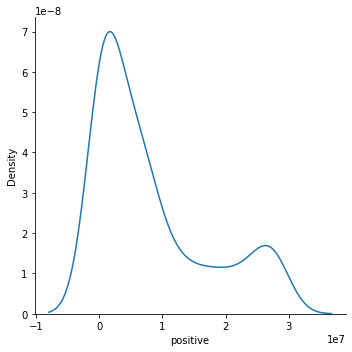

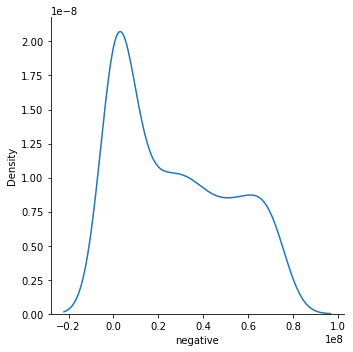

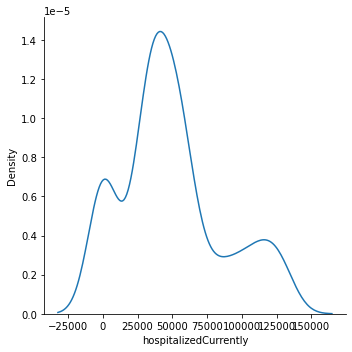

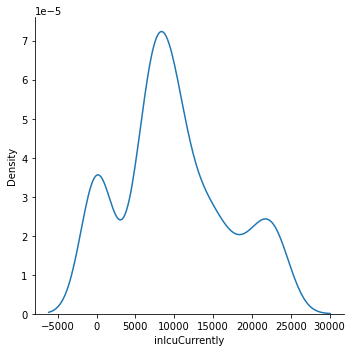

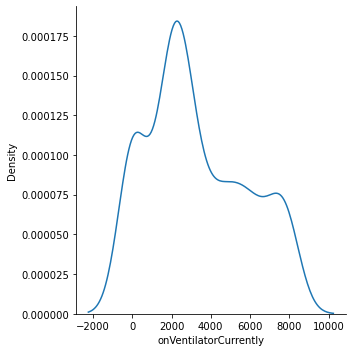

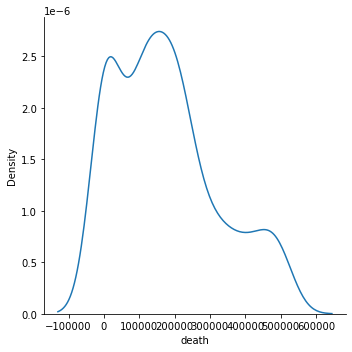

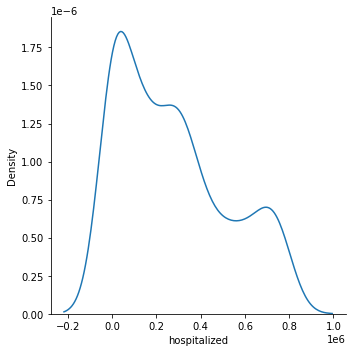

In [81]:
# Create plots to search for any outliers in the dataset
# The graphs below are designed to target visualizing outliers for columns of interest to research objectives
matplotlib.pyplot.figure()
seaborn.displot(x=us_daily_df.positive, kind='kde')
seaborn.displot(x=us_daily_df.negative, kind='kde')
seaborn.displot(x=us_daily_df.hospitalizedCurrently, kind='kde')
seaborn.displot(x=us_daily_df.inIcuCurrently, kind='kde')
seaborn.displot(x=us_daily_df.onVentilatorCurrently, kind='kde')
seaborn.displot(x=us_daily_df.death, kind='kde')
seaborn.displot(x=us_daily_df.hospitalized, kind='kde')

<AxesSubplot:>

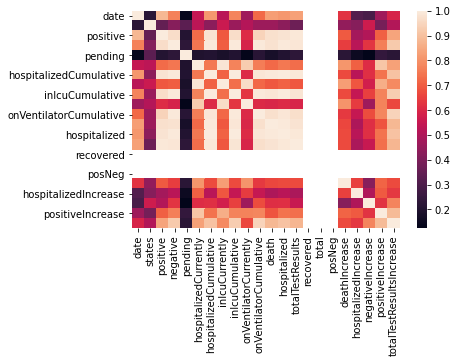

In [82]:
# Create a heatmap for showing correlation
# The following heatmap is helpful in analyzing highly correlated data columns. 
# Data that is in white had no data points associated with it and can be dropped.

fig, ax = matplotlib.pyplot.subplots()
seaborn.heatmap(us_daily_df.corr(), ax=ax)

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics 
import numpy as np

## Hospitalizations to Deaths - Linear Regression Modeling
linear_regression = LinearRegression()

us_daily_df = us_daily_df.fillna(0)
X_value = us_daily_df.hospitalized.values.reshape(-1, 1)
Y_value = us_daily_df.death.values.reshape(-1, 1)

linear_regression.fit(X_value, Y_value)

prediction = linear_regression.predict(X_value)

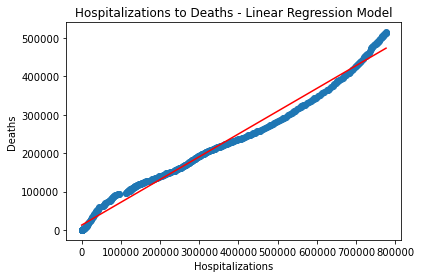

In [120]:
matplotlib.pyplot.scatter(X_value, Y_value)
matplotlib.pyplot.plot(X_value, prediction, color='red')
matplotlib.pyplot.title('Hospitalizations to Deaths - Linear Regression Model')
matplotlib.pyplot.xlabel('Hospitalizations')
matplotlib.pyplot.ylabel('Deaths')
matplotlib.pyplot.show()

In [138]:
## Compare National data with State data
cdc_deaths_by_state_df = pd.read_csv("https://raw.githubusercontent.com/COVID19Tracking/covid-tracking-data/master/data/cdc_cases_deaths.csv")
cdc_deaths_by_state_df.fillna(0)
cdc_deaths_by_state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49980 entries, 0 to 49979
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   submission_date  49980 non-null  object 
 1   state            49980 non-null  object 
 2   tot_cases        49980 non-null  int64  
 3   conf_cases       27642 non-null  float64
 4   prob_cases       27570 non-null  float64
 5   new_case         49980 non-null  int64  
 6   pnew_case        46278 non-null  float64
 7   tot_death        49980 non-null  int64  
 8   conf_death       27217 non-null  float64
 9   prob_death       27217 non-null  float64
 10  new_death        49980 non-null  int64  
 11  pnew_death       46310 non-null  float64
 12  created_at       49980 non-null  object 
 13  consent_cases    41645 non-null  object 
 14  consent_deaths   42483 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 5.7+ MB


In [146]:
## Covid-19 Cases to Deaths (Consuming Local Data) - Linear Regression Modeling
linear_regression = LinearRegression()

X_value = cdc_deaths_by_state_df.tot_cases.values.reshape(-1, 1)
Y_value = cdc_deaths_by_state_df.tot_death.values.reshape(-1, 1)

linear_regression.fit(X_value, Y_value)

prediction = linear_regression.predict(X_value)

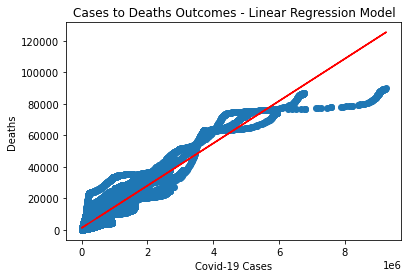

In [147]:
matplotlib.pyplot.scatter(X_value, Y_value)
matplotlib.pyplot.plot(X_value, prediction, color='red')
matplotlib.pyplot.title('Cases to Deaths Outcomes - Linear Regression Model')
matplotlib.pyplot.xlabel('Covid-19 Cases')
matplotlib.pyplot.ylabel('Deaths')
matplotlib.pyplot.show()